In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


In [4]:
boston=load_boston()  # Loading boston dataset
print(boston.keys())
print(boston.DESCR)
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos['Price']=boston.target
bos.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
bos.shape

(506, 14)

In [6]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
bos.isna().sum()  # Checking for null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [8]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
bos.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
Price      229
dtype: int64

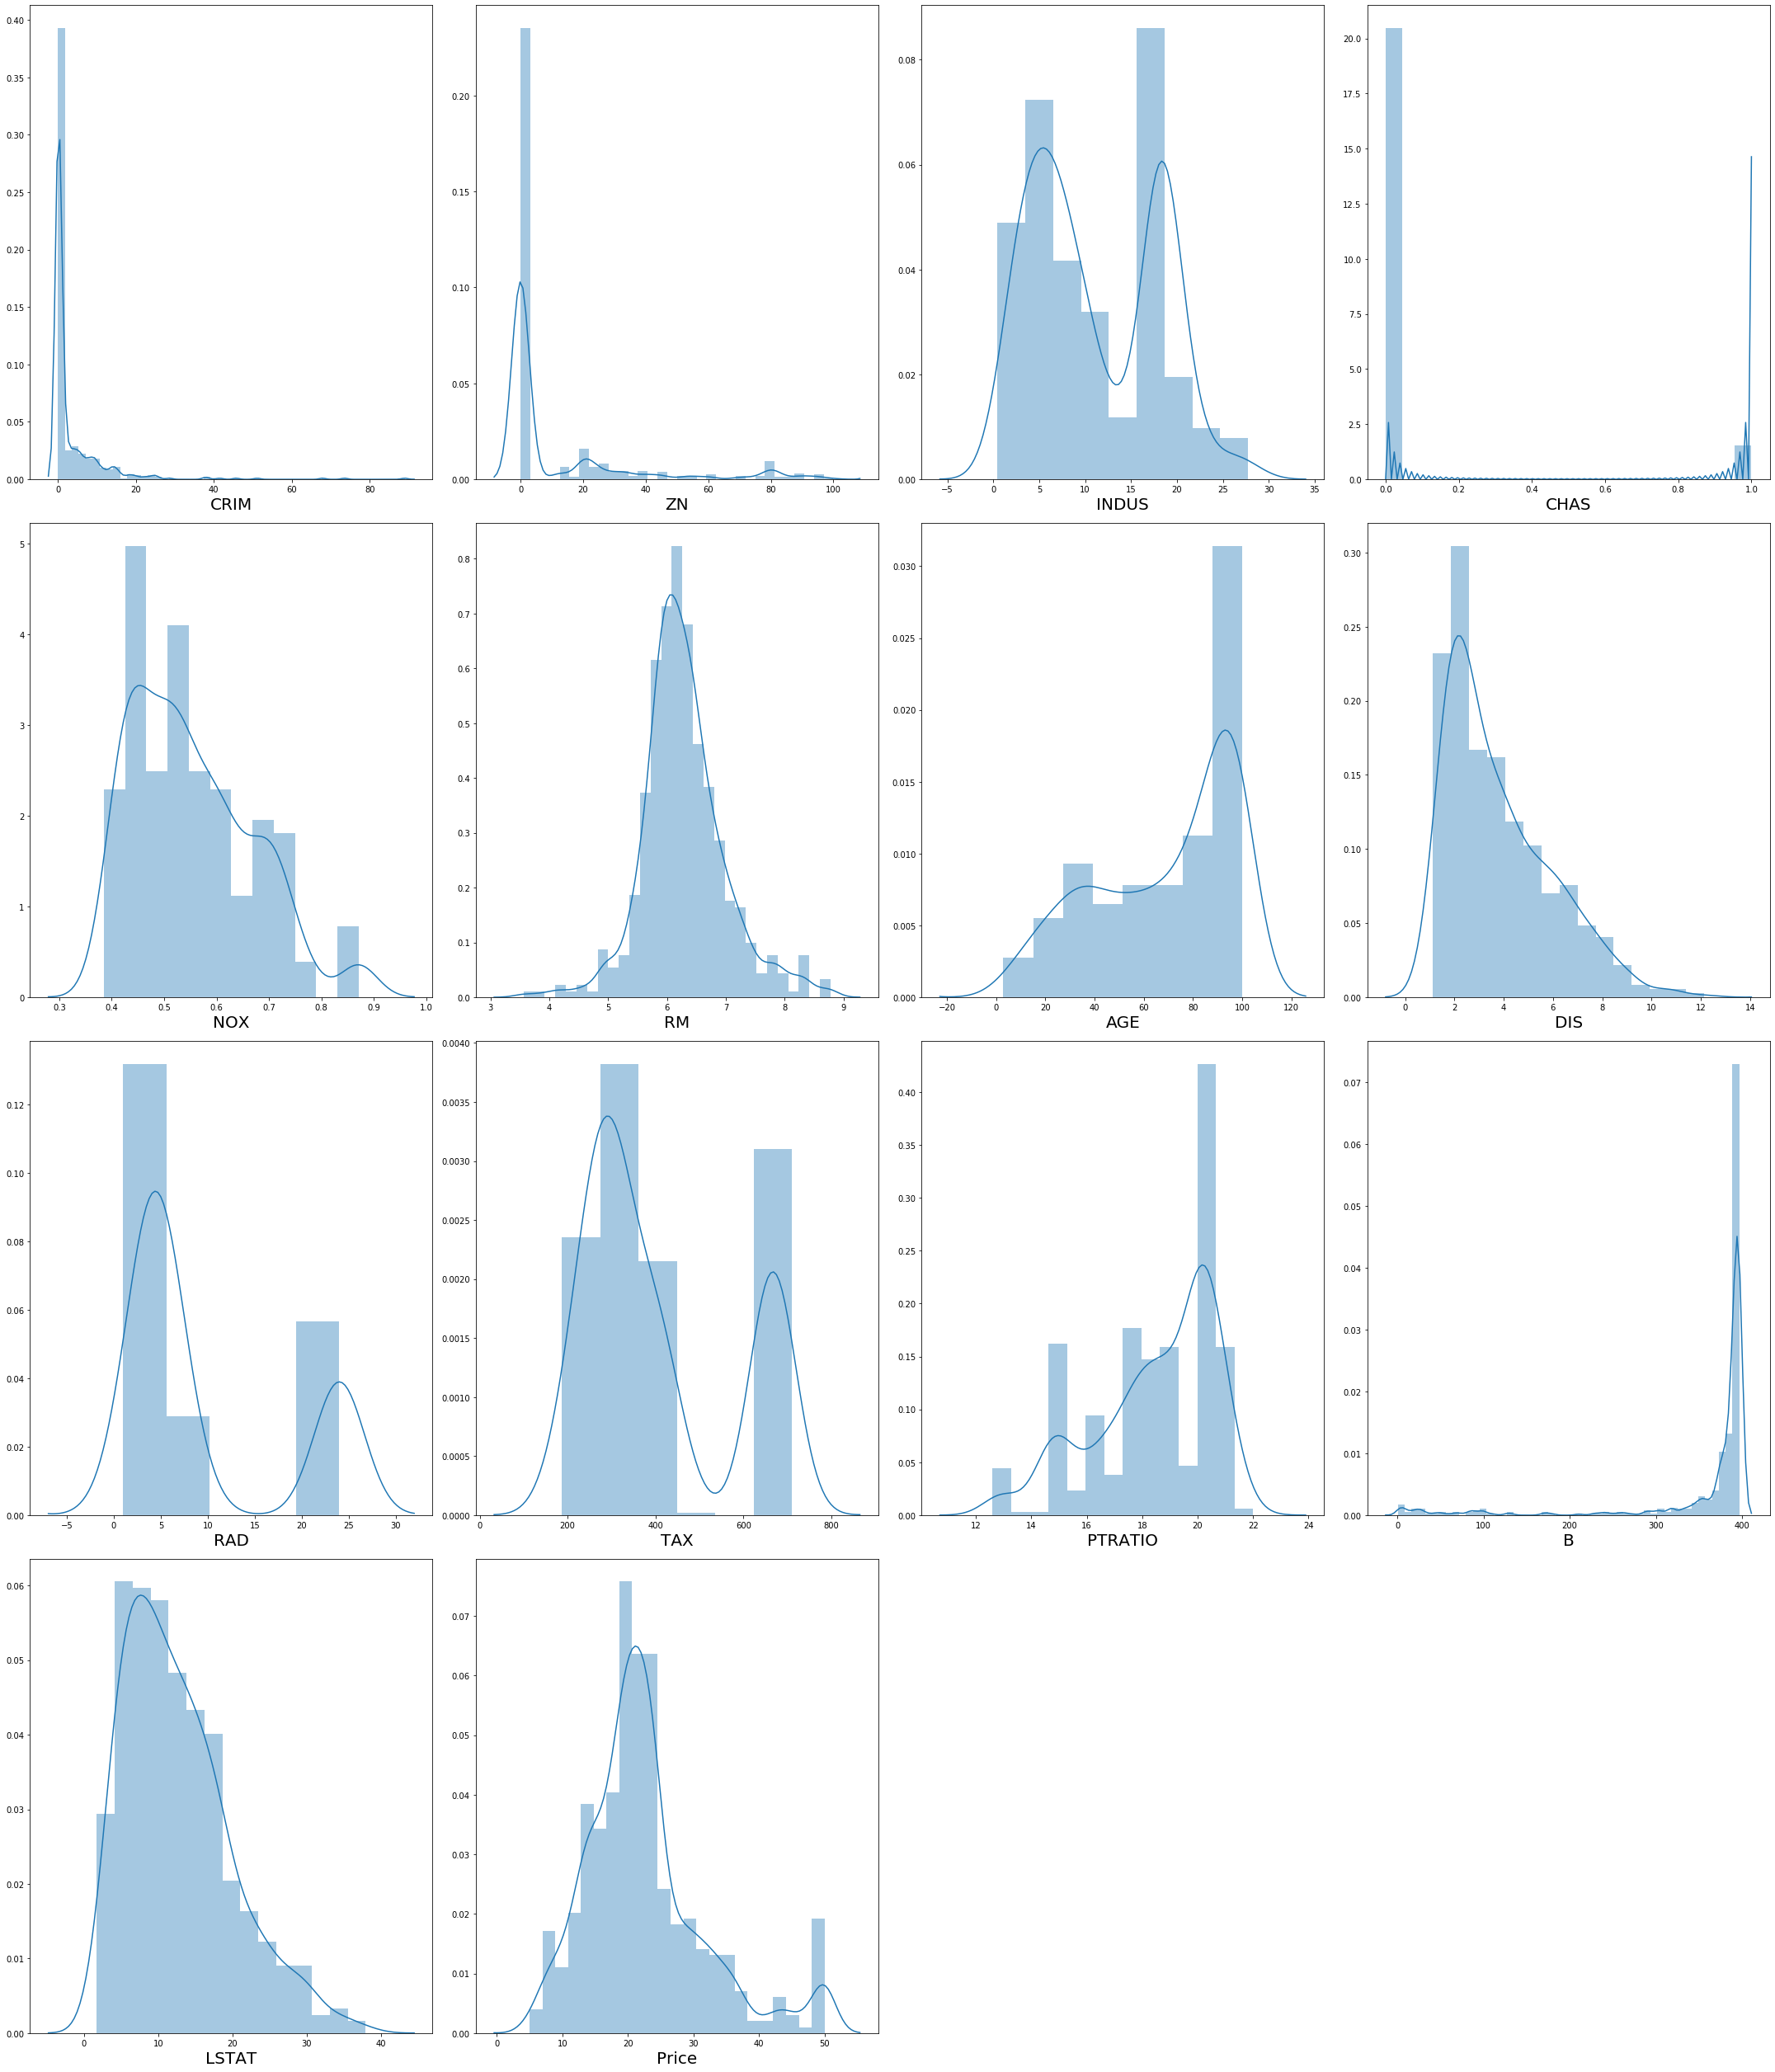

In [10]:
# Plot the distributions of both features and Target

plt.figure(figsize=(30,35),facecolor='white')
plotnumber=1
for column in bos:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout();

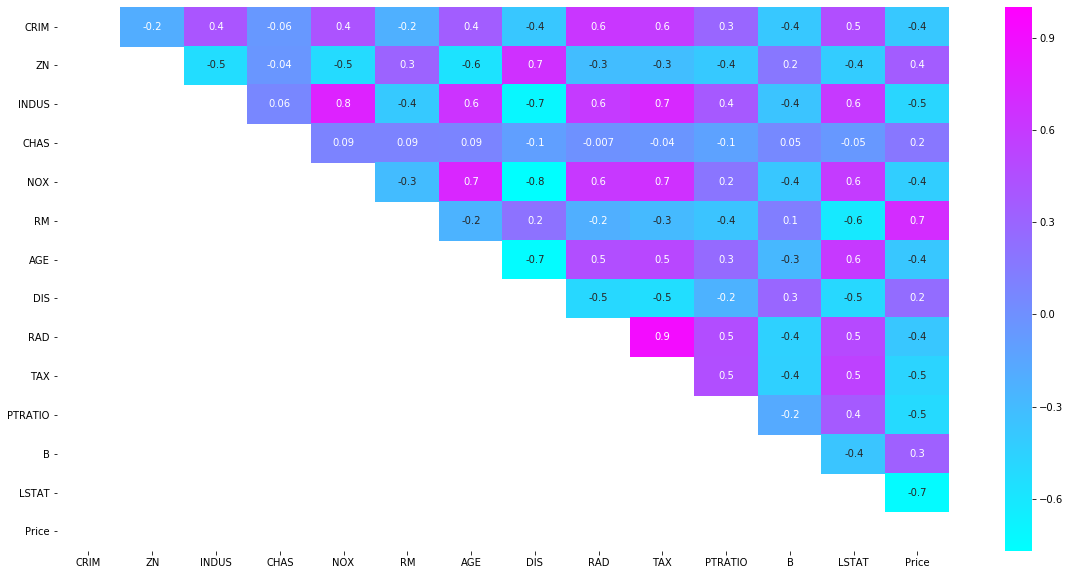

In [12]:
# plotting the correlation heatmap to tnow 1)the correlation between feature and target columns 2)Multicolinearity

mask=np.tril(bos.corr())
plt.figure(figsize=(20,10))
sns.heatmap(bos.corr(),cmap='cool',annot=True,fmt='.1g',mask=mask);

#### From the above heatmap, we can clearly see that the feature ' RM ' has a positive correlation and feature 'LSTAT' has negative correlation with Target ' Price'

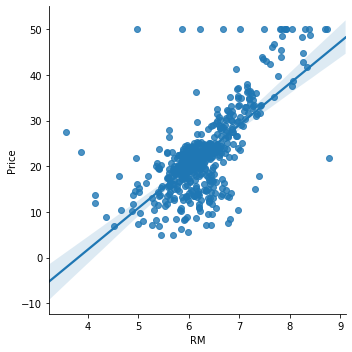

In [25]:
# plotting scatterplot to see the linear relationship that exist between feature and target columns.

sns.lmplot('RM','Price',data=bos);

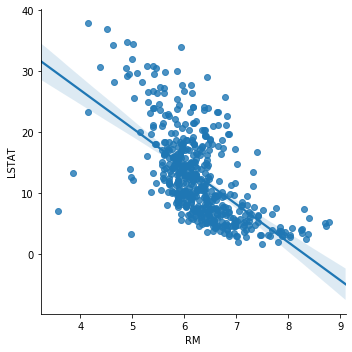

In [24]:
sns.lmplot('RM','LSTAT',data=bos);

####  from the above scatter plots,we can also clearly see that there is some linear relationship between features ' RM, LSTAT ' and target ' Price '

In [53]:
# Seperating feature and target columns

x=bos.drop(columns = ['Price'])
y=bos['Price']

In [54]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [55]:
# Calculating variance inflation factor of feature variables to check for multicolinearity.

variables=x_scaled
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables,i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


#### a VIF value greater than 5 means a very severe multicollinearity.The VIF values of RAD and TAX are greater than 5 and the above heatmap also confirms this,so we need to remove one of the colums.

In [63]:
x=bos.drop(columns=['RAD','Price'])
x_scaled=scaler.fit_transform(x)

In [64]:
# splitting our data into train and test sets

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [80]:
rand_reg=RandomForestRegressor(random_state=6)  # training the model
rand_reg.fit(x_train,y_train)
rand_reg.score(x_train,y_train)

C:\Users\Chaitanya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=6, verbose=0,
                      warm_start=False)

0.9806004355367339

In [81]:
rand_reg.score(x_test,y_test)

0.8611119083723406

##### our test score is less than training score, looks like our model is overfitting

In [82]:
# we will tune some hyperparameters using the GridSearchCV algorithm.

grid_param = {
    "n_estimators" : [90,100,115,130],
    'bootstrap': [True],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [83]:
# model training using GridsearchCV to find the best parameters

grid_search = GridSearchCV(estimator=rand_reg,param_grid=grid_param,cv=10,n_jobs =-1,verbose = 3)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 10368 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 5392 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6256 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | e

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=6,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': range

In [84]:
grid_search.best_params_
grid_search.best_score_

{'bootstrap': True,
 'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 130}

0.8572997315681092

In [93]:
# training the model using best parameters from GridsearchCV

rand_reg1=RandomForestRegressor(bootstrap= True,max_depth= 13,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators= 130)

In [96]:
rand_reg1.fit(x_train,y_train)
rand_reg1.score(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=130,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

0.9786693521114863

In [97]:
rand_reg1.score(x_test,y_test)

0.8804018691230698

In [98]:
# Let's do some more tweak in the hyper parameters and try gridSearch on it.

grid_param = {
    "n_estimators" : [90,100,115],
    'bootstrap': [True],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [99]:
grid_search = GridSearchCV(estimator=rand_reg1,param_grid=grid_param,cv=10,n_jobs =-1,verbose = 3)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   42.4s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=13, max_features='log2',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=130, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_features': ['auto', 'log2'],
                         'm

In [100]:
grid_search.best_params_
grid_search.best_score_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

0.8541029172286838

In [101]:
rand_reg2=RandomForestRegressor(bootstrap= True,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 100)

In [102]:
rand_reg2.fit(x_train,y_train)
rand_reg2.score(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

0.9750048205432531

In [103]:
rand_reg2.score(x_test,y_test)

0.8648270680948456

#### Although our dataset is realtively small, let's use PCA for feature selection and see if it improves our accuracy

In [104]:
x=bos.drop(columns = ['Price'])
y=bos['Price']

In [105]:
# normalizing the data

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

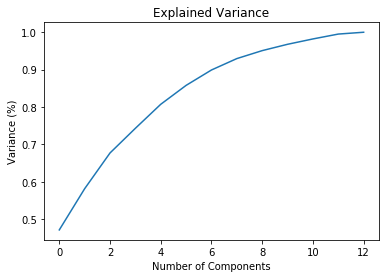

In [106]:
pca = PCA()
principalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance');

#### We can see that around 95% of the variance is being explained by 8 components. So instead of giving all 13 columns as input in our algorithm let's use these 8 principal components instead.

In [108]:
# creating principal components

pca = PCA(n_components=8)
new_data = pca.fit_transform(x_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-2.098297,0.773113,0.342943,-0.891774,0.423070,-0.315338,0.318641,0.295832
1,-1.457252,0.591985,-0.695199,-0.487459,-0.195876,0.264223,0.553861,-0.223670
2,-2.074598,0.599639,0.167122,-0.739204,-0.934534,0.448095,0.484560,0.105166
3,-2.611504,-0.006871,-0.100284,-0.343721,-1.104956,0.664649,0.622641,0.255941
4,-2.458185,0.097712,-0.075348,-0.427907,-1.065924,0.617047,0.705086,-0.134524
...,...,...,...,...,...,...,...,...
501,-0.314968,0.724285,-0.860896,-0.434740,-1.121040,0.508064,0.199056,-0.249896
502,-0.110513,0.759308,-1.255979,-0.309376,-0.891542,0.408208,0.191779,-0.146502
503,-0.312360,1.155246,-0.408598,-0.786304,-1.595185,0.467947,0.294119,-0.638660
504,-0.270519,1.041362,-0.585454,-0.678134,-1.416024,0.482259,0.271597,-0.579344


In [109]:
# training our model on new data

x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
rand_reg3=RandomForestRegressor(random_state=6)
rand_reg3.fit(x_train,y_train)
rand_reg3.score(x_train,y_train)

C:\Users\Chaitanya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=6, verbose=0,
                      warm_start=False)

0.959066653427732

In [110]:
rand_reg3.score(x_test,y_test)

0.7435897810186691

In [111]:
# we are tuning the hyperparameters

grid_param = {
    "n_estimators" : [90,100,115,130],
    'bootstrap': [True],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [114]:
# model training using GridsearchCV to find the best parameters

grid_search = GridSearchCV(estimator=rand_reg3,param_grid=grid_param,cv=10,n_jobs =-1,verbose = 3)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   33.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=6,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_features': ['

In [115]:
grid_search.best_params_
grid_search.best_score_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

0.7553452172615397

In [117]:
# training the model using best parameters from GridsearchCV

rand_reg4=RandomForestRegressor(bootstrap= True,max_features= 'auto',min_samples_leaf= 3,min_samples_split= 4,n_estimators= 100)

In [118]:
rand_reg4.fit(x_train,y_train)
rand_reg4.score(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

0.9224225086860489

In [119]:
rand_reg4.score(x_test,y_test)

0.7582054345279654

In [120]:
# Let's do some more tweak in the hyper parameters and try gridSearch on it.

grid_param = {
    "n_estimators" : [90,100,115],
    'bootstrap': [True],
    'min_samples_leaf' : [1,2,3,4,5],
    'min_samples_split': [4,5,6,7,8],
    'max_features' : ['auto','log2']
}

In [121]:
grid_search = GridSearchCV(estimator=rand_reg4,param_grid=grid_param,cv=10,n_jobs =-1,verbose = 3)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   38.7s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=3,
                                             min_samples_split=4,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_features'

In [122]:
grid_search.best_params_
grid_search.best_score_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 90}

0.7614962899751057

In [123]:
rand_reg5=RandomForestRegressor(bootstrap= True,
 max_features= 'log2',
 min_samples_leaf= 1,
 min_samples_split= 4,
 n_estimators= 90)

In [124]:
rand_reg5.fit(x_train,y_train)
rand_reg5.score(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=90,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

0.9547472952492465

In [125]:
rand_reg5.score(x_test,y_test)

0.7488335948355161